In [2]:
dpfile = "results_dp.txt"

res = [x.strip().split('\t') for x in open(dpfile).readlines()]

In [3]:
gpu = {}
res_gpu = res[1:-2]
for i in range(len(res_gpu)):
    if i%2 == 0:
        k = res_gpu[i][0].split(' = ')[1]
        gpu[int(k)] = float(res_gpu[i+1][1])

In [4]:
import matplotlib.pyplot as plt

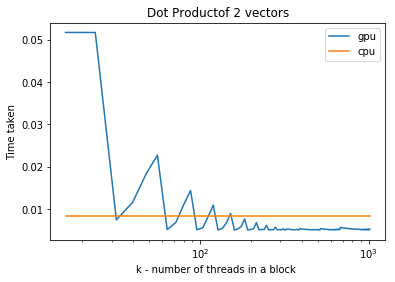

In [12]:

plt.title("Dot Productof 2 vectors")
plt.xlabel("k - number of threads in a block ")
plt.ylabel("Time taken")
plt.semilogx(gpu.keys(), gpu.values(), label="gpu")
plt.semilogx(gpu.keys(), len(gpu.keys())*[float(res[-2][1])], label="cpu")
plt.legend()

plt.savefig("dotprod")
plt.show()


cpu time mono 	1.4604e-05
gpu time 	1.7801e-05
cpu time para 	0.000816561
gpu mem copy time 	1.6545e-05
Max error: 0.000000


In [35]:
r = open("results_dp_varied.txt").readlines()
r = [x.strip("\n") for x in r]
graph = {}
currentk = None

for i in range(len(r)):
    if r[i][0] == "k":
        currentk = int(r[i].split(' = ')[-1])
        
        graph[currentk] = {"keys": [], "cpu_mono": [], "gpu": [], "cpu_para": [], "mem_copy": []}

    elif currentk is not None:
        t = r[i].split(" ")
        graph[currentk]["keys"].append(t[0])
        graph[currentk]["cpu_mono"].append(t[1])
        graph[currentk]["gpu"].append(t[2])
        graph[currentk]["cpu_para"].append(t[3])
        graph[currentk]["mem_copy"].append(t[4])


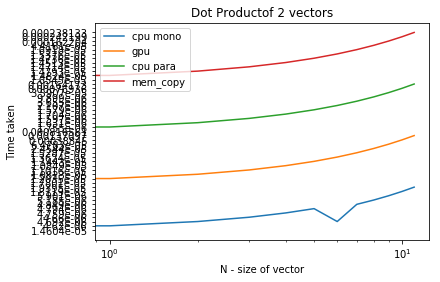

In [38]:
plt.title("Dot Productof 2 vectors")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[1024]["keys"], graph[1024]["cpu_mono"], label="cpu mono")
plt.semilogx(graph[1024]["keys"], graph[1024]["gpu"], label="gpu")
plt.semilogx(graph[1024]["keys"], graph[1024]["cpu_para"], label="cpu para")
plt.semilogx(graph[1024]["keys"], graph[1024]["mem_copy"], label="mem_copy")
plt.legend()

plt.savefig("dotprod_varied")
plt.show()


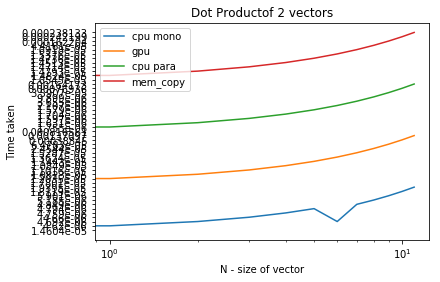

In [39]:
plt.title("Dot Productof 2 vectors")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[64]["keys"], graph[1024]["cpu_mono"], label="cpu mono")
plt.semilogx(graph[64]["keys"], graph[1024]["gpu"], label="gpu")
plt.semilogx(graph[64]["keys"], graph[1024]["cpu_para"], label="cpu para")
plt.semilogx(graph[64]["keys"], graph[1024]["mem_copy"], label="mem_copy")
plt.legend()

plt.savefig("dotprod_varied")
plt.show()


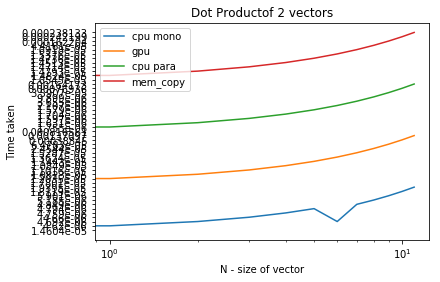

In [40]:
plt.title("Dot Productof 2 vectors")
plt.xlabel("N - size of vector")
plt.ylabel("Time taken")
plt.semilogx(graph[32]["keys"], graph[1024]["cpu_mono"], label="cpu mono")
plt.semilogx(graph[32]["keys"], graph[1024]["gpu"], label="gpu")
plt.semilogx(graph[32]["keys"], graph[1024]["cpu_para"], label="cpu para")
plt.semilogx(graph[32]["keys"], graph[1024]["mem_copy"], label="mem_copy")
plt.legend()

plt.savefig("dotprod_varied")
plt.show()


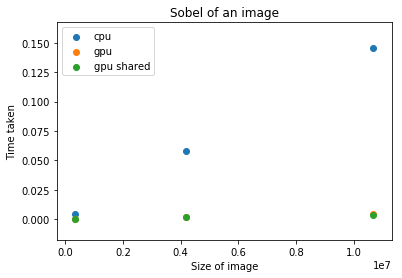

In [68]:
#Sobel

block_dim = [12, 24, 48, 96]
drone = [0.00465116, 9.59265e-05,  0.00011062]
drone_huge = [0.145083, 0.00405407, 0.00355989]
carre = [0.0577216, 0.00154007, 0.00147957]

cpu = [0.00465116, 0.145083, 0.0577216]
gpu = [9.59265e-05, 0.00405407, 0.00154007]
gpu_shared = [0.00011062, 0.00355989, 0.00147957]

sizes = [720*480, 4000*2667, 2048*2048 ]

plt.title("Sobel of an image: block 24")
plt.xlabel("Size of image")
plt.ylabel("Time taken")

plt.scatter(sizes, cpu, label="cpu")
plt.scatter(sizes, gpu, label = "gpu")
plt.scatter(sizes, gpu_shared, label  = "gpu shared")
plt.legend()

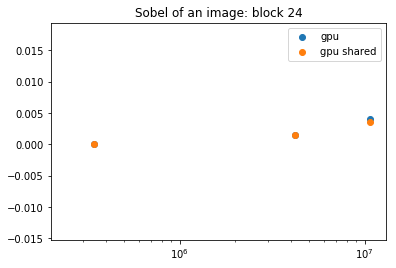

In [73]:
plt.title("Sobel of an image: block 24")

plt.scatter(sizes, gpu, label = "gpu")
plt.scatter(sizes, gpu_shared, label = "gpu shared")
plt.xscale("log")
plt.legend()

In [84]:
# drone huge, compare block differences for gpu and gpu shared

res = """0.144395 0.00613768 0.00392608 0.000106806
0.143492 0.00341635 0.00319514 0.000106817
0.143857 0.00339072 0.00877929 0.000105585
0.143831 1.78706e-06 1.54784e-06 0.000105874
0.144693 1.79628e-06 1.58292e-06 0.000106976"""

res = [x.strip().split(" ") for x in res.split("\n")]
res

[['0.144395', '0.00613768', '0.00392608', '0.000106806'],
 ['0.143492', '0.00341635', '0.00319514', '0.000106817'],
 ['0.143857', '0.00339072', '0.00877929', '0.000105585'],
 ['0.143831', '1.78706e-06', '1.54784e-06', '0.000105874'],
 ['0.144693', '1.79628e-06', '1.58292e-06', '0.000106976']]

In [82]:
blocks = [ 8 ,16 ,32 ,48 ,64 ]

In [98]:
cpu = []
gpu = []
gpu_shared = []
gpu_mem_copy = []
for r in res:
    cpu.append(float(r[0]))
    gpu.append(float(r[1]))
    gpu_shared.append(float(r[2]))
    gpu_mem_copy.append(float(r[1]) + float(r[3]))


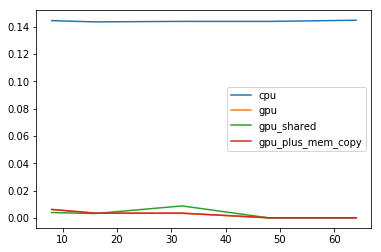

In [100]:
plt.plot(blocks, cpu, label="cpu")
plt.plot(blocks, gpu, label="gpu")
plt.plot(blocks, gpu_shared, label="gpu_shared")
plt.plot(blocks, gpu_mem_copy, label="gpu_plus_mem_copy")
plt.legend()

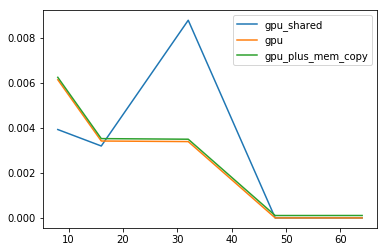

In [101]:
plt.plot(blocks, gpu_shared, label="gpu_shared")
plt.plot(blocks, gpu, label="gpu")
plt.plot(blocks, gpu_mem_copy, label="gpu_plus_mem_copy")


plt.legend()

In [102]:
#Transpose 

